### Fit lineare e Test del Chi Quadro ###
Inserire il livello di criticità nell variabile 'alpha' e le unità di misura del coeeficiente angolare 'unma' e della intercetta 'unmb' 




8
[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04 ]
[0.03 0.1  0.15 0.21 0.28 0.33 0.4  0.45]
[0.0048 0.0048 0.0048 0.0048 0.0048 0.0048 0.0048 0.0048]

coefficiente correlazione =  0.9993849419912101

[[3.47222222e+05 7.81250000e+03]
 [7.81250000e+03 2.21354167e+02]]
[[ 1.39885714e-05 -4.93714286e-04]
 [-4.93714286e-04  2.19428571e-02]]

[[1. 0.]
 [0. 1.]]

[84635.41666667  2452.25694444]
[-0.02678571 12.02380952]


 intercetta a (u.m.)=  -0.026785714285714413
 coeff.angolare b (u.m.)=  12.023809523809526
 errore su intercetta siga (u.m.)=  0.0037401298678751017
 errore su coeff.angolare sigb (u.m.)=  0.1481312159636082


Intercetta (a) [cm]
Coefficiente angolare (b) [N])
Errore su a [cm])
Errore su b [N])

 Chi^2 =  8.112185846560845
 errore standard della stima (u.m.) =  0.005581289604633828

Chi quadro critico,  12.591587243743977
Chi quadro sospetto,  1.6353828943279067
Esito del test,  Accettato




                        Variabile     Valore
0           Coefficiente di corr.  

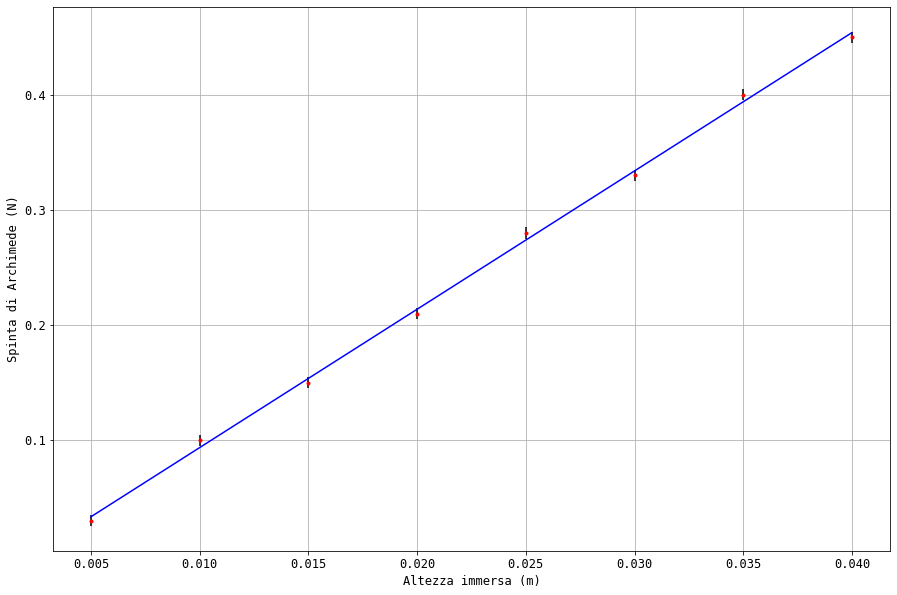

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import csv
import matplotlib.pyplot as plt
import pandas as pd
from random import randint


#Livello di criticità es. (.05)
alpha=.05
unma='cm'
unmb='N'
plt.rcParams['figure.figsize'] = [15, 10]

#Importo dati.csv con tre colonne (x, y, yerr) in tre liste

data = csv.reader(open('dati.csv', 'r'), delimiter=",", quotechar='|')
lxcol, lycol, lyerrcol = [], [], []

for row in data:
    lxcol.append(row[0])
    lycol.append(row[1])
    lyerrcol.append(row[2])
    
#Converto in array
ydatap = np.asarray(lycol, dtype=np.float64)
xdatap = np.asarray(lxcol, dtype=np.float64)
yerrp = np.asarray(lyerrcol, dtype=np.float64)
print('')
if (len(xdatap)!=len(ydatap)): print ("dimensioni vettori disuguali")
if (len(yerrp)!=len(ydatap)): print ("dimensioni vettori disuguali")
npoint = len(xdatap)
print(npoint)
print(xdatap)
print(ydatap)
print(yerrp)




yerrSq = yerrp*yerrp
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdatap/yerrSq).sum()
sum_xSq_over_yerrSq = (xdatap*xdatap/yerrSq).sum()
sum_y_over_yerrSq = (ydatap/yerrSq).sum()
sum_xy_over_yerrSq = (xdatap*ydatap/yerrSq).sum()

#Calcolo Coefficiente correlazione lineare

sum_x = (xdatap).sum()
sum_y = (ydatap).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdatap-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydatap-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print('')
print ("coefficiente correlazione = ",corrcoeff)
print('')
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
print(matD)
matD_inv = np.linalg.inv(matD)
print(matD_inv)
print('')
print(np.dot(matD,matD_inv))
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
print('')
print(matB)
print(np.dot(matD_inv,matB))

a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print('')
print('')
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)
print('')
print('')

#CSV Fit
#First column merging with um
aatext='Intercetta (a) ['+ unma+ ']'
print(aatext)
abtext='Coefficiente angolare (b) ['+ unmb+ '])'
print(abtext)
aeatext='Errore su a ['+ unma+ '])'
print(aeatext)
aebtext='Errore su b ['+ unmb+ '])'
print(aebtext)
#Creating Arrays
corrhead = np.array(['Variabile','Valore'])
acorr = np.array(['Coefficiente di corr.',corrcoeff])
aa = np.array([aatext,a])
ab = np.array([abtext,b])
aea = np.array([aeatext,siga])
aeb = np.array([aebtext,sigb])
#writing csv
with open('corr.csv', mode='w') as corr:
    corr_writer = csv.writer(corr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    corr_writer.writerow(corrhead)
    corr_writer.writerow(acorr)
    corr_writer.writerow(aa)
    corr_writer.writerow(ab)
    corr_writer.writerow(aea)    
    corr_writer.writerow(aeb)

#Plot


font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
fig, ax = plt.subplots()


ax.grid('both')

ax.set_xlabel('Altezza immersa (m)')
ax.set_ylabel('Spinta di Archimede (N)')
plt.plot(xdatap,b*xdatap+a,'b',xdatap,ydatap,'r.')
plt.errorbar(xdatap,ydatap,yerrp,ecolor='black', ls=" ")


scarto1 = (ydatap-a-b*xdatap)/yerrp
scarto2 = (ydatap-a-b*xdatap)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)


print('')
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)
print('')

#Chi2 logic test
def check(c2,cr,su):
    if c2>cr:
        return 'Rigettato'
    elif c2<cr and c2>su:
        return 'Accettato'
    elif c2<su:
        return 'Sospetto'
    else:
        print('Check error')
        return 0
    
#Numero GDL
n=len(xdatap)-2

crit=scipy.stats.chi2.ppf(1-alpha , df=n)
sus=scipy.stats.chi2.ppf(alpha , df=n)

print('Chi quadro critico, ',crit)
print('Chi quadro sospetto, ',sus)
es=check(chi2,crit,sus)
print("Esito del test, ",es)

#Arrays for csv
asig = np.array(['Livello di significatività',alpha])
agdl = np.array(['Gradi di libertà',crit])
acrit = np.array(['Chi quadro critico',crit])
chi = np.array(['Chi quadro ',chi2])
asus = np.array(['Chi quadro sospetto',sus])
esito = np.array(['Esito',es])
head = np.array(['Variabile','Valore'])
#CSV writing
with open('fit.csv', mode='w') as fit:
    fit_writer = csv.writer(fit, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    fit_writer.writerow(head)
    fit_writer.writerow(asig)
    fit_writer.writerow(agdl)
    fit_writer.writerow(chi)    
    fit_writer.writerow(acrit)
    fit_writer.writerow(asus)
    fit_writer.writerow(esito)   
    
print('')
print('')

dfcorr = pd.read_csv ('corr.csv')
dffit = pd.read_csv ('fit.csv')
    
print('')
print('')
print(dfcorr)
    
print('')
print('')
print(dffit)
    
print('')
print('')
indexcorr='corr'+str(randint(0, 1000))
indexfit='fit'+str(randint(0, 1000))
    
print('')
print('')
print(dfcorr.to_latex(index=False, caption='Dati relativi al fit lineare', bold_rows=True, label=indexcorr, position='ht'))
    
print('')
print('')
print(dffit.to_latex(index=False,  caption='Dati relativi al test del $\chi^2$', bold_rows=True, label=indexfit, position='ht'))

    
print('')
print('')
